In [75]:
from ekonlpy.tag import Mecab
import pandas as pd
import glob
from tqdm import tqdm
from ekonlpy.sentiment import MPCK
import re

In [2]:
mecab = Mecab()
mpck = MPCK()

In [60]:
# file_list = glob.glob('csvfile/*.csv')

In [61]:
# 3사의 뉴스를 다합치는 코드입니다

# with open('ALL_NEWS.csv', 'w', encoding='utf=8') as f:#인포맥스, 이데일리, 연합뉴스 다합치기
#     cn=0
#     for file in file_list:
#         cn+=1
        
#         df = pd.read_csv(file)
#         if cn==1:#첫번째에만 header를 넣었다
#             df.to_csv(f,index=False, header=True, encoding='utf-8')
#         else : 
#             df.to_csv(f,index=False, header=False, encoding='utf-8')
    

In [141]:
news_file.to_pickle('allnews_0729.pkl')
bond.to_pickle('bond_0729.pkl')
mkb.to_pickle('mkb_0729.pkl')

In [ ]:
news_file = pd.read_pickle('allnews_0729.pkl')
bond = pd.read_pickle('bond_0729.pkl')
mkb = pd.read_pickle('mkb_0729.pkl')

In [22]:
from ekonlpy.sentiment import MPCK
mpck = MPCK()

# ngrams = mpck.ngramize(tokens)
# score = mpck.classify(tokens + ngrams, intensity_cutoff=1.5)

In [61]:
# from nltk import sent_tokenize
# for i in tqdm(range(len(news_file['body']))):
#     news_file['ngramize'][i] = mpck.ngramize(mpck.tokenize(sent_tokenize((news_file['body'][i]))    

100%|████████████████████████████████████████████████████████████████████████| 220125/220125 [1:25:46<00:00, 42.77it/s]


In [166]:
# 기사 문장별 split 후 ngramize
ngram_list=[]
for i in tqdm(range(len(news_bond_mkb['body']))):
    try:
        sent_ngram=[]
        sent=sent_tokenize(news_bond_mkb['body'][i])
        for s in sent:
            ngrams = mpck.ngramize(mpck.tokenize(s),keep_overlapping_ngram=False)
            if ngrams:
                sent_ngram.append(ngrams)
        ngram_list.append(sent_ngram)
    except:
        print(i)

# unigram 은 아예 단어장에 포함되지 않으므로 노력할 필요 없음

 53%|█████████████████████████████████████████▍                                    | 2452/4616 [27:08<16:05,  2.24it/s]

2452


 54%|██████████████████████████████████████████▏                                   | 2500/4616 [27:29<19:57,  1.77it/s]

2500


 55%|██████████████████████████████████████████▉                                   | 2543/4616 [27:46<15:53,  2.17it/s]

2543


 56%|███████████████████████████████████████████▉                                  | 2598/4616 [28:12<24:21,  1.38it/s]

2598


 57%|████████████████████████████████████████████▏                                 | 2617/4616 [28:24<26:47,  1.24it/s]

2617


 57%|████████████████████████████████████████████▋                                 | 2646/4616 [28:51<24:22,  1.35it/s]

2646


 58%|█████████████████████████████████████████████▏                                | 2673/4616 [29:06<22:08,  1.46it/s]

2673


 59%|██████████████████████████████████████████████                                | 2723/4616 [29:37<18:02,  1.75it/s]

2723


 60%|██████████████████████████████████████████████▊                               | 2772/4616 [30:00<18:06,  1.70it/s]

2772


 62%|████████████████████████████████████████████████▍                             | 2870/4616 [31:16<30:58,  1.06s/it]

2870


 63%|████████████████████████████████████████████████▊                             | 2890/4616 [31:35<35:25,  1.23s/it]

2890


 63%|█████████████████████████████████████████████████▏                            | 2912/4616 [31:56<30:33,  1.08s/it]

2912


 68%|█████████████████████████████████████████████████████                         | 3137/4616 [35:50<25:45,  1.04s/it]

3137


 68%|█████████████████████████████████████████████████████▎                        | 3156/4616 [36:05<10:33,  2.30it/s]

3154


 69%|█████████████████████████████████████████████████████▍                        | 3163/4616 [36:12<27:22,  1.13s/it]

3163


 69%|█████████████████████████████████████████████████████▌                        | 3167/4616 [36:15<20:54,  1.15it/s]

3165


 69%|██████████████████████████████████████████████████████                        | 3197/4616 [36:42<24:01,  1.02s/it]

3197


 69%|██████████████████████████████████████████████████████                        | 3201/4616 [36:44<17:07,  1.38it/s]

3199


 92%|█████████████████████████████████████████████████████████████████████▌      | 4227/4616 [1:03:12<17:21,  2.68s/it]

4227


 93%|██████████████████████████████████████████████████████████████████████▌     | 4289/4616 [1:05:50<13:53,  2.55s/it]

4289


100%|████████████████████████████████████████████████████████████████████████████| 4616/4616 [1:18:12<00:00,  1.02s/it]


In [ ]:
news_bond_mkb['ngram'] = ngram_list

In [62]:
import pickle
news_bond_mkb = news_bond_mkb[['ngram']]

In [ ]:
news_bond_mkb.to_pickle('ngramized_news_bond_mkb.pkl')
news_bond_mkb = pd.read_pickle('ngramized_news_bond_mkb.pkl')

In [242]:
callrate = pd.read_csv('callrate_month_upanddown.csv')

callrate = callrate[30:4658][['date','up_down']]
callrate = callrate.rename(columns={'date':'time'})
callrate = callrate.set_index('time')
result_set = news_bond_mkb.merge(callrate, left_index=True, right_index=True)
result_set.head()


,ngram,up_down
time,,
2005-05-01,"[[금리/NNG;인상/NNG], [금리/NNG;인상/NNG], [금리/NNG;인상/...",상승
2005-05-02,"[[하락/NNG;제한적/VAX], [내수/NNG;회복/NNG], [경기/NNG;저점...",상승
2005-05-03,"[[유가/NNG;하락/NNG], [유가/NNG;떨어/VV], [공급/NNG;증가/N...",상승
2005-05-04,"[[점차/MAG;상승/NNG;확대/NNG], [지수/NNG;상승/NNG], [fed...",하락
2005-05-05,"[[ftse100/NNG;오르/VV;지수/NNG;상승/NNG, 강하/VA;상승/NN...",하락


In [217]:
news_bond_mkb = pd.read_pickle('맞춤법 적용안한 ngram리스트.pkl')

In [225]:
news_bond_mkb['ngramize']

0       [[금리/NNG;인상/NNG], [금리/NNG;인상/NNG], [금리/NNG;인상/...
1       [[하락/NNG;제한적/VAX], [내수/NNG;회복/NNG], [경기/NNG;저점...
2       [[유가/NNG;하락/NNG], [유가/NNG;떨어/VV], [공급/NNG;증가/N...
3       [[점차/MAG;상승/NNG;확대/NNG], [지수/NNG;상승/NNG], [fed...
4       [[ftse100/NNG;오르/VV;지수/NNG;상승/NNG, 강하/VA;상승/NN...
                              ...                        
4611    [[디플레이션/NNG;경기/NNG;침체/NNG, 금리/NNG;목표/NNG;상향/NN...
4612    [[펜딩/NNG;주택/NNG;판매/NNG;지수/NNG;상승/NNG, ff/NNG;금...
4613    [[부동산/NNG;규제/NNG;강화/NNG, 불확실성/NNG;증대/NNG, 건전성/...
4614    [[미/NNG;국채/NNG;금리/NNG;상승/NNG;제한/NNG, 경제/NNG;성장...
4615    [[금융시장/NNG;변동성/NNG;크/VV, 통화정책/NNG;양적완화/NNG, 양적...
Name: ngramize, Length: 4616, dtype: object

In [220]:
r= pd.read_pickle('result_set맞춤법o_0730.pkl')

In [235]:
r['ngram'] = np.array(news_bond_mkb['ngramize'])

In [240]:
news_bond_mkb = r[['ngram']]

In [318]:
news_bond_mkb

,ngram
time,
2005-05-01,"[[금리/NNG;인상/NNG], [금리/NNG;인상/NNG], [금리/NNG;인상/..."
2005-05-02,"[[하락/NNG;제한적/VAX], [내수/NNG;회복/NNG], [경기/NNG;저점..."
2005-05-03,"[[유가/NNG;하락/NNG], [유가/NNG;떨어/VV], [공급/NNG;증가/N..."
2005-05-04,"[[점차/MAG;상승/NNG;확대/NNG], [지수/NNG;상승/NNG], [fed..."
2005-05-05,"[[ftse100/NNG;오르/VV;지수/NNG;상승/NNG, 강하/VA;상승/NN..."
...,...
2017-12-27,"[[디플레이션/NNG;경기/NNG;침체/NNG, 금리/NNG;목표/NNG;상향/NN..."
2017-12-28,"[[펜딩/NNG;주택/NNG;판매/NNG;지수/NNG;상승/NNG, ff/NNG;금..."
2017-12-29,"[[부동산/NNG;규제/NNG;강화/NNG, 불확실성/NNG;증대/NNG, 건전성/..."


In [320]:
result_set.to_pickle('result_set_0730.pkl')

# result_set이 call금리랑 ngramize까지 합쳐서 완료된거

# 논문저자가 만든 ngram사전

In [88]:
vocab = pd.read_csv('mp_polarity_vocab.txt', delimiter=' ', header=None, names=['ngram','n'])
vocab

## 토큰수 세기

In [268]:
from collections import defaultdict

# 범주에 속하는 토큰수 세기 1(스팸), 0(정상))
haw_cnt = 0
dov_cnt = 0

# 토큰별로 문서내 빈도수 카운팅
wordfreq = defaultdict(lambda : [0, 0])

#label 0 이 hawkish   1은 dovish라 가정
for doc_ngrams, label in zip(result_set['ngram'], result_set['up_down']) :
    
    for sent_ngram in doc_ngrams:
        for ngram in sent_ngram:
            if label == '상승':
                wordfreq[ngram][0] += 1
            elif label == '하락':
                wordfreq[ngram][1] += 1

for key, (cnt0, cnt1) in wordfreq.items():
    haw_cnt += cnt0
    dov_cnt += cnt1

print('haw_cnt : {}'.format(haw_cnt))
print('dov_cnt : {}'.format(dov_cnt))

haw_cnt : 723162
dov_cnt : 809988


In [271]:
wordfreq2 = wordfreq.copy()

# del cur['key']

for key, value in wordfreq2.items():
    if sum(value)<4:
        del wordfreq[key]

In [272]:
len(wordfreq)

44434

In [273]:
haw_cnt = 0
dov_cnt = 0
for val in wordfreq.values():
    haw_cnt+=val[0]
    dov_cnt+=val[1]
    
print(haw_cnt, dov_cnt)

707679 793366


In [274]:

k=0.5
for key, val in wordfreq.items():
    val.append((k+val[0])/(2*k+haw_cnt))
    val.append((k+val[1])/(2*k+dov_cnt))
    val.append(val[2]/val[3])

In [275]:
wordfreq_origin = wordfreq.copy()
for key, val in wordfreq.items():
    if val[4]>1.3:
        wordfreq[key]=1
    elif val[4] < 1/1.3:
        wordfreq[key]=-1
    else: wordfreq[key]=0

In [276]:
wordfreq

defaultdict(<function __main__.<lambda>()>,
            {'금리/NNG;인상/NNG': 1,
             '금리/NNG;인상/NNG;긴축/NNG': 1,
             '경기/NNG;둔화/NNG': 0,
             '물가/NNG;오르/VV': 0,
             '인플레이션/NNG;압력/NNG;억제/NNG': 1,
             '지표/NNG;예상/NNG;나쁘/VA': 1,
             '실적/NNG;양호/NNG': 1,
             '전망/NNG;실망/NNG': -1,
             '전망/NNG;좋/VA;않/VX': 0,
             '긍정/NNG;부정/NNG': 0,
             '기업/NNG;수익성/NNG;악화/NNG;우려/NNG': 1,
             '실적/NNG;실망/NNG': 1,
             '우려/NNG;높/VV': 0,
             '경제/NNG;지표/NNG;성장/NNG;둔화/NNG': 1,
             '물가/NNG;인상/NNG': 0,
             '인플레이션/NNG;압박/NNG': 1,
             '유가/NNG;상승/NNG': 0,
             '지표/NNG;부진/NNG;금리/NNG;인상/NNG': 1,
             '소비/NNG;지표/NNG;부진/NNG': -1,
             '금리/NNG;플러스/NNG': 0,
             '고용/NNG;지표/NNG;양호/NNG': 0,
             '지표/NNG;위축/NNG': -1,
             '금리/NNG;인상/NNG;유보/NNG': 0,
             '경기/NNG;성장/NNG;둔화/NNG;우려/NNG': 1,
             '원화/NNG;절상/NNG': 1,
             '자금/NNG;많/

# mpb 문장별로 계산

In [277]:
# 기사 문장별 split 후 ngramize
ngram_list=[]
for i in tqdm(range(len(mkb['body']))):
    try:
        sent_ngram=[]
        sent=sent_tokenize(mkb['body'][i])
        for s in sent:
            ngrams = mpck.ngramize(mpck.tokenize(s),keep_overlapping_ngram=False)
            if ngrams:
                sent_ngram.append(ngrams)
        ngram_list.append(sent_ngram)
    except:
        print(i)

100%|████████████████████████████████████████████████████████████████████████████████| 148/148 [01:01<00:00,  2.39it/s]


In [169]:
mkb['ngram']=ngram_list

In [317]:
wordfreq

defaultdict(<function __main__.<lambda>()>,
            {'금리/NNG;인상/NNG': 1,
             '금리/NNG;인상/NNG;긴축/NNG': 1,
             '경기/NNG;둔화/NNG': 0,
             '물가/NNG;오르/VV': 0,
             '인플레이션/NNG;압력/NNG;억제/NNG': 1,
             '지표/NNG;예상/NNG;나쁘/VA': 1,
             '실적/NNG;양호/NNG': 1,
             '전망/NNG;실망/NNG': -1,
             '전망/NNG;좋/VA;않/VX': 0,
             '긍정/NNG;부정/NNG': 0,
             '기업/NNG;수익성/NNG;악화/NNG;우려/NNG': 1,
             '실적/NNG;실망/NNG': 1,
             '우려/NNG;높/VV': 0,
             '경제/NNG;지표/NNG;성장/NNG;둔화/NNG': 1,
             '물가/NNG;인상/NNG': 0,
             '인플레이션/NNG;압박/NNG': 1,
             '유가/NNG;상승/NNG': 0,
             '지표/NNG;부진/NNG;금리/NNG;인상/NNG': 1,
             '소비/NNG;지표/NNG;부진/NNG': -1,
             '금리/NNG;플러스/NNG': 0,
             '고용/NNG;지표/NNG;양호/NNG': 0,
             '지표/NNG;위축/NNG': -1,
             '금리/NNG;인상/NNG;유보/NNG': 0,
             '경기/NNG;성장/NNG;둔화/NNG;우려/NNG': 1,
             '원화/NNG;절상/NNG': 1,
             '자금/NNG;많/

In [315]:
mkb.to_pickle('mkb0730.pkl')

In [312]:
import numpy as np
mkb['tone']=0
polar_list=[]
count_word=[]
sentence_score_list=[]
for i, doc in enumerate(mkb['ngram'][:10]):
    cnt=0
    sentence_score=[]
    for sentence in doc:
        
        plus=0
        minus=0
        for ngram in sentence:
            if ngram in wordfreq:
                cnt+=1
                minus += wordfreq[ngram]
                plus += np.abs(wordfreq[ngram])
            
        
        if plus!=0:
            if minus/plus>0:
                sentence_score.append(1)
            elif minus/plus<0:
                sentence_score.append(-1)
        else:sentence_score.append(0.1)
                
    if sentence_score:
        sentence_score_list.append(sentence_score)
        polar = sum(sentence_score)/sum(list(map(abs, sentence_score)))
    else : polar =0
    polar_list.append(polar)
    count_word.append(cnt)

In [313]:
sentence_score_list

[[1], [1], [1], [1], [-1], [-1], [-1], [1], [-1], [-1]]

In [310]:
polar_list

[1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0]

In [302]:
mkb['tone'] = polar_list

In [304]:
mkb

,body,ngram,tone
time,,,
2017-11-30,일부 위원은 최근 미국의 금융·경제상황을 보면 금년 12월 미 연준이 금리를 인상...,"[[가계/NNG;대출/NNG;위험관리/NNG;강화/NNG, 단기/NNG;금리/NNG...",1.000000
2017-10-19,일부 위원은 최근 미국에서는 임금상승세가 확대되고 세제개혁에 대한 기대 감이 커지...,"[[fed/NNG;금리/NNG;인상/NNG;보유자산/NNG;축소/NNG, 크레딧/N...",1.000000
2017-08-31,일부 위원은 미국의 금리 정상화 행보에도 불구하고 미 달러화가 약세기조를 지속하면...,"[[국제/NNG;금융시장/NNG;fed/NNG;금리/NNG;인상/NNG, 국제/NN...",1.000000
2017-07-13,일부 위원은 주요국에서는 성장과 고용이 회복국면의 정점을 향해 가고 있음.에도 불구...,"[[국제/NNG;금융시장/NNG;변동성/NNG;확대/NNG, 가계/NNG;대출/NN...",1.000000
2017-05-25,일부 위원은 최근 국제금융시장이 안정된 모습을 지속하는 가운데 국내금융 시장도 외...,"[[외국인/NNG;증권/NNG;투자자금/NNG;유입/NNG;확대/NNG, 외평채/N...",-1.000000
...,...,...,...
2005-09-08,일부 위원은 최근 인도네시아 금융불안 사태가 발생한 가운데 국제 환투기세력이 인...,"[[금리/NNG;인상/NNG;장기/NNG;금리/NNG;상승/NNG, 인상/NNG;가...",0.512195
2005-08-11,일부 위원은 위안화 절상 이후 아시아 통화중 우리나라 원화의 절상폭이 가장 컸다...,"[[부동산/NNG;가격/NNG;상승/NNG;금리/NNG;인상/NNG, 은행/NNG;...",1.000000
2005-07-07,일부 위원은 6월 들어 국제유가가 크게 오르고 원화와 엔화간 동조화 현상이 뚜렷...,"[[금리/NNG;인상/NNG;주택가격/NNG;상승/NNG, 경기/NNG;회복/NNG...",0.238095


## tone값구한거 저장해주세요 version 이름 바꿔서

In [283]:
##version name을 적어주세요
mpb.to_pickle('mpb_tone_v1')

# - 여기부터 tone하고 전체기간기준금리 합쳐서 결과값내는거임

In [284]:
rate = pd.read_pickle('전체기간_기준금리.pkl')

#tone 불러오기
tone = mkb

In [285]:
tone_rate = tone.merge(rate, left_index=True, right_index=True, how='left' )

In [257]:
tone_rate.head()

,body,ngram,tone,base_rate
time,,,,
2017-11-30,일부 위원은 최근 미국의 금융·경제상황을 보면 금년 12월 미 연준이 금리를 인상...,"[[가계/NNG;대출/NNG;위험관리/NNG;강화/NNG, 단기/NNG;금리/NNG...",1.0,1.5
2017-10-19,일부 위원은 최근 미국에서는 임금상승세가 확대되고 세제개혁에 대한 기대 감이 커지...,"[[fed/NNG;금리/NNG;인상/NNG;보유자산/NNG;축소/NNG, 크레딧/N...",1.0,1.5
2017-08-31,일부 위원은 미국의 금리 정상화 행보에도 불구하고 미 달러화가 약세기조를 지속하면...,"[[국제/NNG;금융시장/NNG;fed/NNG;금리/NNG;인상/NNG, 국제/NN...",1.0,1.5
2017-07-13,일부 위원은 주요국에서는 성장과 고용이 회복국면의 정점을 향해 가고 있음.에도 불구...,"[[국제/NNG;금융시장/NNG;변동성/NNG;확대/NNG, 가계/NNG;대출/NN...",1.0,1.5
2017-05-25,일부 위원은 최근 국제금융시장이 안정된 모습을 지속하는 가운데 국내금융 시장도 외...,"[[외국인/NNG;증권/NNG;투자자금/NNG;유입/NNG;확대/NNG, 외평채/N...",-1.0,1.5


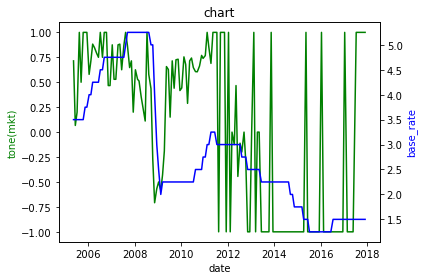

In [286]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()  #보조축 차트 만들기

ax1.set_xlabel('date')

ax1.set_ylabel('tone(mkt)', color='g')  #라인차트 컬러 지정

ax1.plot(tone_rate['tone'], 'g-')  #라인차트 형태 지정

ax2 = ax1.twinx()  #보조축을 위한 X축 공유 지정

ax2.plot(tone_rate['base_rate'], 'b-')

ax2.set_ylabel('base_rate', color='b')

plt.title('chart')

# plt.grid()

fig.tight_layout()

plt.show()

In [287]:
tone_rate[['tone','base_rate']].corr()

,tone,base_rate
tone,1.000000,0.531898
base_rate,0.531898,1.000000
